## SPARK FOUNDATION -DATA SCIENCE AND BUSINESS ANAYST

### TASK-02 Prediction using Unsupervised ML


##### AUTHOR-HIMANI CHHOKAR

## clustering 
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters. The goal of the k-means algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.


K-Means Clustering algorithm used for unsupervised learning for clustering problem. K- variable value easily decide based 
on the number of clusters business is looking for.Popular Distance measures to use: Euclidean distance.Specify number 
of clusters K.Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the
centroids without replacement.Keep iterating until there is no change to the centroids. i.e assignment of data points
to clusters isn’t changing.


In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sn
from plotnine.data import economics
#from plotnine import ggplot, aes, geom_line
from plotnine import *

%matplotlib inline

In [134]:
dataset=pd.read_csv('iris.csv')
iris_df = pd.DataFrame(dataset)
iris_df # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### lets visualize the set before clustering

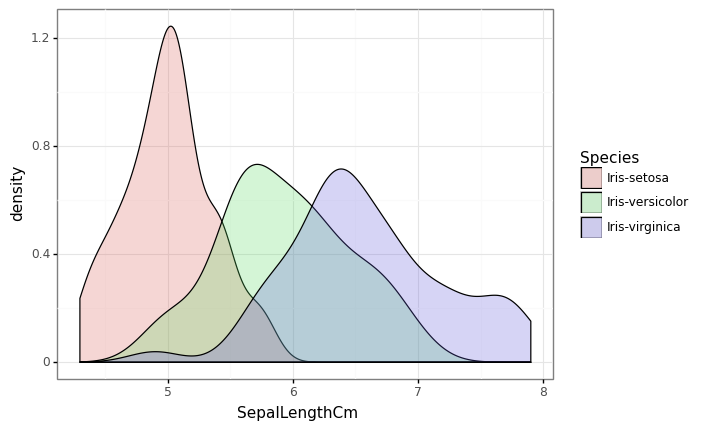

<ggplot: (11850108)>

In [136]:

ggplot(iris_df, aes(x='SepalLengthCm', fill = 'Species'))+ theme_bw()+geom_density(alpha=0.25)


In [137]:
iris_df.shape

(150, 6)

In [138]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [139]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [140]:
iris_df.duplicated().any()

False

In [141]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [142]:
iris_df.drop(['Id'],axis=1, inplace =True)

In [143]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
iris_df['Species'] = l.fit_transform(iris_df['Species'])


In [144]:
x=iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

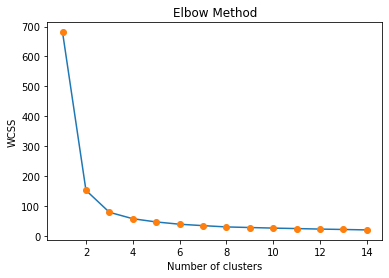

In [147]:
#within cluster sum of square
x=iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.plot(np.arange(1, 15), wcss,'o')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [148]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
k_model=kmeans.fit(x)
iris_df['cluster']=kmeans.predict(x)


In [149]:
#return the cluster vector
clusters=k_model.labels_
clusters


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [150]:
iris_df['cluster'] = clusters


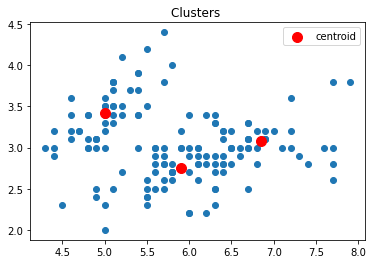

In [151]:
plt.show()
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red',label='centroid')
plt.title('Clusters ')
plt.legend()
plt.show()
plt.show()


In [152]:
y=iris_df.Species

In [153]:
from mpl_toolkits.mplot3d import Axes3D


   SepalLengthCm  SepalWidthCm  PetalLengthCm  Cluster
0       0.447544      0.061912       0.171719      0.0
1       0.850765      0.103271       0.776748      1.0
2       0.428862      0.550573       0.281989      0.0
3       0.176741      0.937852       0.935713      0.0
4       0.893514      0.318684       0.786179      0.0
5       0.105774      0.431157       0.258067      1.0
6       0.863867      0.762662       0.189266      0.0
7       0.832257      0.092561       0.656314      0.0
8       0.845750      0.466661       0.352731      1.0
9       0.708187      0.897790       0.845282      0.0


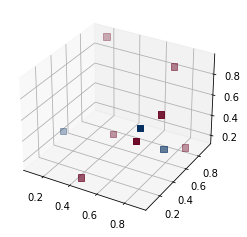

In [154]:
v = np.random.rand(10,4)
v[:,3] = np.random.randint(0,2,size=10)
iris_df = pd.DataFrame(v, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm',"Cluster"])
print (iris_df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(iris_df['SepalLengthCm'])
y = np.array(iris_df['SepalWidthCm'])
z = np.array(iris_df['PetalLengthCm'])

ax.scatter(x,y,z, marker="s", c=iris_df["Cluster"], s=40, cmap="RdBu")

plt.show()
